In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\PC\Documents\CSV_DATASETS\animal_disease_dataset.csv")

In [8]:
df.head(10)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia
5,goat,10,101.2,loss of appetite,blisters on gums,difficulty walking,foot and mouth
6,sheep,6,103.3,loss of appetite,depression,painless lumps,lumpy virus
7,goat,6,101.7,difficulty walking,blisters on tongue,loss of appetite,foot and mouth
8,buffalo,9,102.5,depression,painless lumps,loss of appetite,lumpy virus
9,goat,3,102.7,lameness,blisters on mouth,loss of appetite,foot and mouth


In [9]:
df.shape

(43778, 7)

In [11]:
cow_count = df['Animal'].value_counts()['cow']
print(f"Total number of cows: {cow_count}")
buffalo_count = df['Animal'].value_counts()['buffalo']
print(f"Total number of buffalo: {buffalo_count}")
sheep_count = df['Animal'].value_counts()['sheep']
print(f"Total number of sheep: {sheep_count}")
goat_count = df['Animal'].value_counts()['goat']
print(f"Total number of goat: {goat_count}")


Total number of cows: 11254
Total number of buffalo: 11238
Total number of sheep: 10658
Total number of goat: 10628


In [13]:
# We focus on cows

In [14]:
cows_df = df[df['Animal'] == 'cow'].copy()

# Display information about the new DataFrame
print("Cows Dataset Information:")
print(f"Total number of cow entries: {len(cows_df)}")
print("\nFirst few rows of cows dataset:")
print(cows_df.head())

# Verify we only have cows
print("\nUnique animals in new DataFrame:")
print(cows_df['Animal'].unique())

Cows Dataset Information:
Total number of cow entries: 11254

First few rows of cows dataset:
   Animal  Age  Temperature            Symptom 1         Symptom 2  \
0     cow    3        103.1           depression    painless lumps   
3     cow   14        100.3     loss of appetite  swelling in limb   
11    cow   11        103.9           depression    painless lumps   
19    cow   14        102.7  shortness of breath            sweats   
20    cow    1        103.7           depression  loss of appetite   

           Symptom 3      Disease  
0   loss of appetite    pneumonia  
3    crackling sound     blackleg  
11  loss of appetite  lumpy virus  
19            chills      anthrax  
20    painless lumps  lumpy virus  

Unique animals in new DataFrame:
['cow']


In [15]:
cows_df.head(10)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
11,cow,11,103.9,depression,painless lumps,loss of appetite,lumpy virus
19,cow,14,102.7,shortness of breath,sweats,chills,anthrax
20,cow,1,103.7,depression,loss of appetite,painless lumps,lumpy virus
22,cow,14,100.8,painless lumps,loss of appetite,depression,lumpy virus
24,cow,7,101.9,chest discomfort,swelling in extremities,shortness of breath,anthrax
26,cow,12,100.3,loss of appetite,depression,painless lumps,lumpy virus
30,cow,2,102.7,loss of appetite,sores on hooves,lameness,foot and mouth
38,cow,2,100.3,swelling in limb,crackling sound,difficulty walking,blackleg


In [16]:
# Reseting the index to start from 0

In [17]:
cows_df = cows_df.reset_index(drop=True)

# Display the newly indexed DataFrame
print("Cows DataFrame with reset index:")
print(cows_df.head())

# Verify the index is properly ordered
print("\nIndex range:")
print(f"Starts at: {cows_df.index.min()}")
print(f"Ends at: {cows_df.index.max()}")

Cows DataFrame with reset index:
  Animal  Age  Temperature            Symptom 1         Symptom 2  \
0    cow    3        103.1           depression    painless lumps   
1    cow   14        100.3     loss of appetite  swelling in limb   
2    cow   11        103.9           depression    painless lumps   
3    cow   14        102.7  shortness of breath            sweats   
4    cow    1        103.7           depression  loss of appetite   

          Symptom 3      Disease  
0  loss of appetite    pneumonia  
1   crackling sound     blackleg  
2  loss of appetite  lumpy virus  
3            chills      anthrax  
4    painless lumps  lumpy virus  

Index range:
Starts at: 0
Ends at: 11253


Types of Diseases in the Dataset:
1. pneumonia
2. blackleg
3. lumpy virus
4. anthrax
5. foot and mouth

Disease Distribution:
Disease
blackleg          2494
anthrax           2458
foot and mouth    2433
pneumonia         1955
lumpy virus       1914
Name: count, dtype: int64


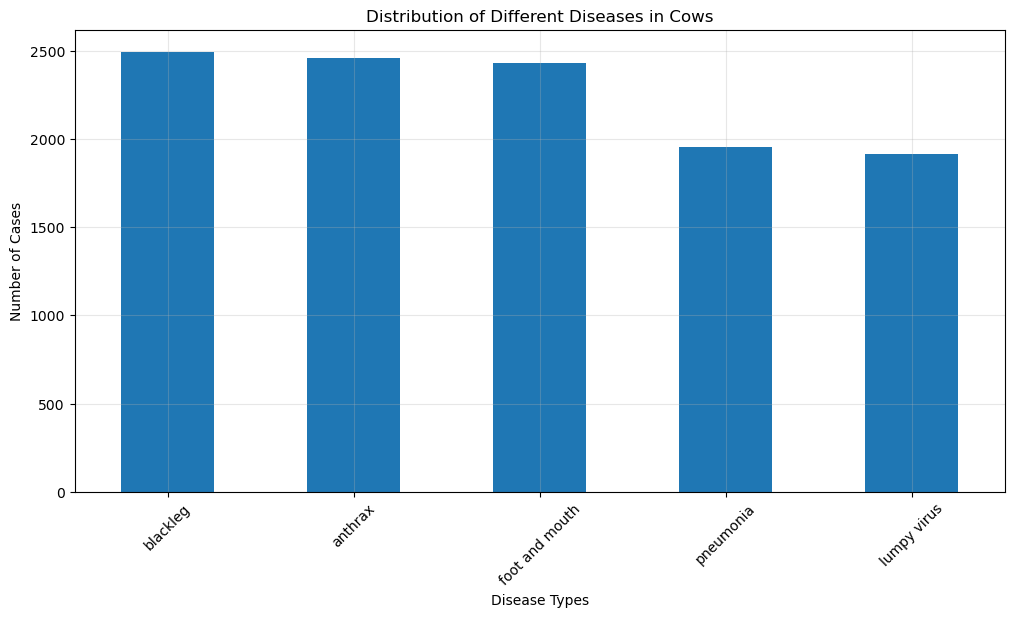

In [18]:
unique_diseases = cows_df['Disease'].unique()
print("Types of Diseases in the Dataset:")
for i, disease in enumerate(unique_diseases, 1):
    print(f"{i}. {disease}")

# Count frequency of each disease
disease_counts = cows_df['Disease'].value_counts()
print("\nDisease Distribution:")
print(disease_counts)

# Visualize disease distribution
plt.figure(figsize=(12, 6))
disease_counts.plot(kind='bar')
plt.title('Distribution of Different Diseases in Cows')
plt.xlabel('Disease Types')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
# Symptom Frequency Analysis

In [22]:
print("Available columns in the dataset:")
print(cows_df.columns.tolist())

Available columns in the dataset:
['Animal', 'Age', 'Temperature', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Disease']


In [24]:
# Get unique symptoms across all symptom columns
unique_symptoms = set(cows_df['Symptom 1'].unique()) | \
                 set(cows_df['Symptom 2'].unique()) | \
                 set(cows_df['Symptom 3'].unique())

print(f"Total number of different symptoms in the dataset: {len(unique_symptoms)}")
print("\nList of all unique symptoms:")
for i, symptom in enumerate(sorted(unique_symptoms), 1):
    print(f"{i}. {symptom}")
# Combine all symptom columns for total frequency count
all_symptoms = pd.concat([
    cows_df['Symptom 1'],
    cows_df['Symptom 2'],
    cows_df['Symptom 3']
])

# Get the frequency count of each symptom
symptom_counts = all_symptoms.value_counts()
print("Total Frequency of Each Symptom:")
for symptom, count in symptom_counts.items():
    print(f"{symptom}: {count} occurrences")

# Calculate percentage of each symptom
symptom_percentages = (symptom_counts / len(all_symptoms)) * 100
print("\nPercentage Distribution of Symptoms:")
for symptom, percentage in symptom_percentages.items():
    print(f"{symptom}: {percentage:.2f}%")

# Count how many times each symptom appears as primary (Symptom 1)
primary_symptoms = cows_df['Symptom 1'].value_counts()
print("\nPrimary Symptom (Symptom 1) Distribution:")
for symptom, count in primary_symptoms.items():
    print(f"{symptom}: {count} cases")

Total number of different symptoms in the dataset: 24

List of all unique symptoms:
1. blisters on gums
2. blisters on hooves
3. blisters on mouth
4. blisters on tongue
5. chest discomfort
6. chills
7. crackling sound
8. depression
9. difficulty walking
10. fatigue
11. lameness
12. loss of appetite
13. painless lumps
14. shortness of breath
15. sores on gums
16. sores on hooves
17. sores on mouth
18. sores on tongue
19. sweats
20. swelling in abdomen
21. swelling in extremities
22. swelling in limb
23. swelling in muscle
24. swelling in neck
Total Frequency of Each Symptom:
loss of appetite: 7825 occurrences
depression: 5357 occurrences
painless lumps: 3869 occurrences
difficulty walking: 1968 occurrences
lameness: 1929 occurrences
crackling sound: 1519 occurrences
fatigue: 1260 occurrences
chest discomfort: 1250 occurrences
sweats: 1246 occurrences
shortness of breath: 1246 occurrences
chills: 1140 occurrences
swelling in muscle: 748 occurrences
swelling in limb: 740 occurrences
swell

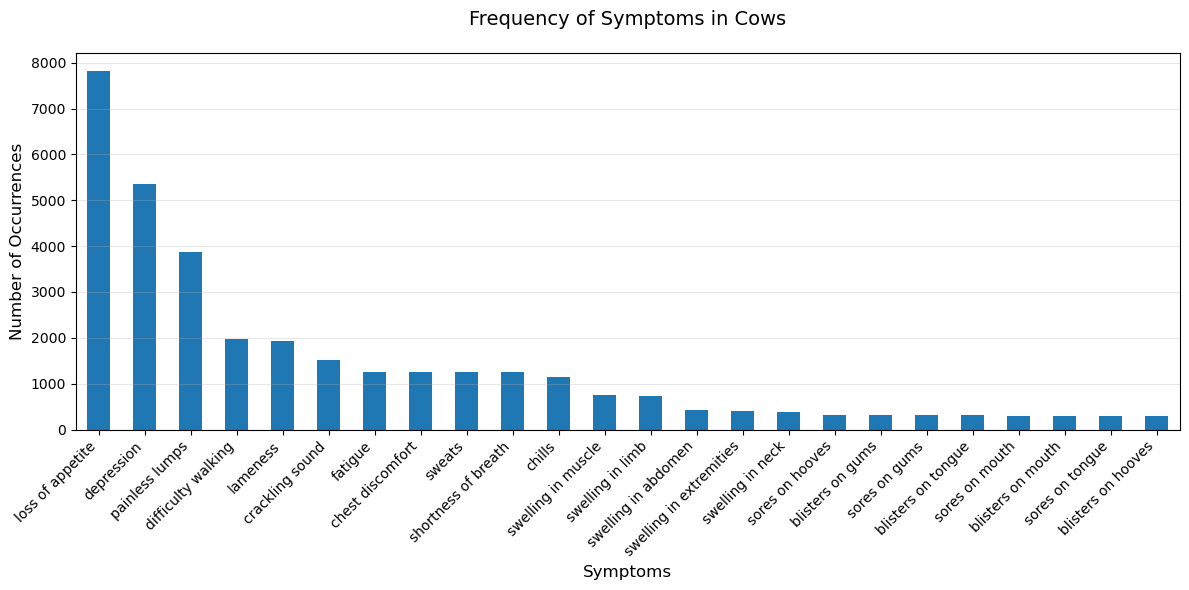

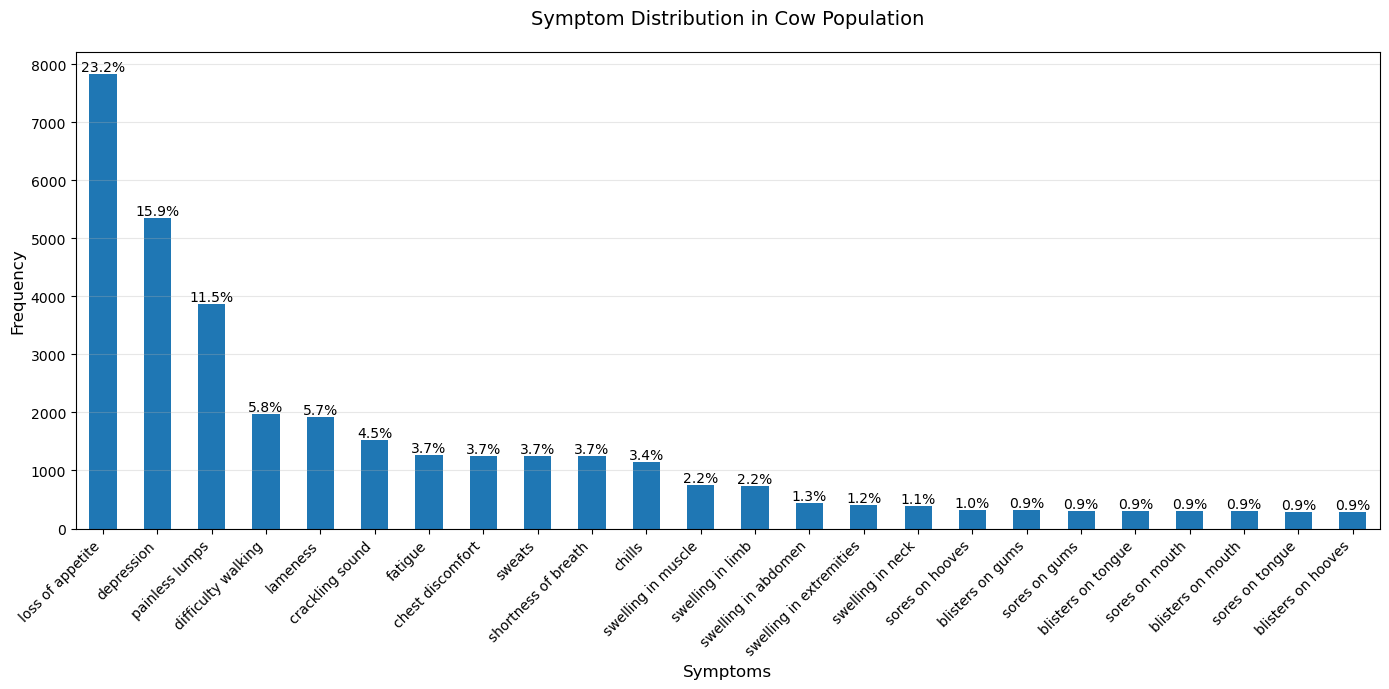

In [25]:
# Create bar chart of symptom frequencies
plt.figure(figsize=(12, 6))
symptom_counts.plot(kind='bar')
plt.title('Frequency of Symptoms in Cows', fontsize=14, pad=20)
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Create a more detailed version with percentage labels
plt.figure(figsize=(14, 7))
ax = symptom_counts.plot(kind='bar')
plt.title('Symptom Distribution in Cow Population', fontsize=14, pad=20)
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add percentage labels on top of each bar
for i, v in enumerate(symptom_counts):
    percentage = (v/len(all_symptoms))*100
    ax.text(i, v, f'{percentage:.1f}%', 
            ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
# Create a matrix of symptoms and diseases
symptom_disease_matrix = pd.DataFrame()

# Count occurrences for each symptom-disease pair
for symptom_col in ['Symptom 1', 'Symptom 2', 'Symptom 3']:
    temp_matrix = pd.crosstab(cows_df[symptom_col], cows_df['Disease'])
    symptom_disease_matrix = symptom_disease_matrix.add(temp_matrix, fill_value=0)

print("Symptom-Disease Occurrence Matrix:")
print(symptom_disease_matrix)

# Calculate percentages within each disease
percentage_matrix = symptom_disease_matrix.div(symptom_disease_matrix.sum()) * 100
print("\nSymptom-Disease Percentage Matrix:")
print(percentage_matrix.round(2))

# Get most common symptoms for each disease
print("\nMost Common Symptoms by Disease:")
for disease in symptom_disease_matrix.columns:
    top_symptoms = symptom_disease_matrix[disease].nlargest(3)
    print(f"\n{disease}:")
    for symptom, count in top_symptoms.items():
        print(f"  {symptom}: {count} occurrences")

Symptom-Disease Occurrence Matrix:
Disease                  anthrax  blackleg  foot and mouth  lumpy virus  \
Symptom 1                                                                 
blisters on gums             0.0       0.0           312.0          0.0   
blisters on hooves           0.0       0.0           288.0          0.0   
blisters on mouth            0.0       0.0           297.0          0.0   
blisters on tongue           0.0       0.0           306.0          0.0   
chest discomfort          1250.0       0.0             0.0          0.0   
chills                    1140.0       0.0             0.0          0.0   
crackling sound              0.0    1519.0             0.0          0.0   
depression                   0.0    1488.0             0.0       1914.0   
difficulty walking           0.0     723.0          1245.0          0.0   
fatigue                   1260.0       0.0             0.0          0.0   
lameness                     0.0     741.0          1188.0       

In [28]:
# Create matrix for Symptom 2 specifically
symptom2_disease_matrix = pd.crosstab(cows_df['Symptom 2'], cows_df['Disease'])

print("Symptom 2 - Disease Occurrence Matrix:")
print(symptom2_disease_matrix)

# Calculate percentages for Symptom 2 within each disease
percentage_matrix_symptom2 = symptom2_disease_matrix.div(symptom2_disease_matrix.sum()) * 100
print("\nSymptom 2 - Disease Percentage Matrix:")
print(percentage_matrix_symptom2.round(2))

# Get most common Symptom 2 occurrences for each disease
print("\nMost Common Secondary Symptoms by Disease:")
for disease in symptom2_disease_matrix.columns:
    top_symptoms = symptom2_disease_matrix[disease].nlargest(3)
    print(f"\n{disease}:")
    for symptom, count in top_symptoms.items():
        print(f"  {symptom}: {count} occurrences")

Symptom 2 - Disease Occurrence Matrix:
Disease                  anthrax  blackleg  foot and mouth  lumpy virus  \
Symptom 2                                                                 
blisters on gums               0         0             112            0   
blisters on hooves             0         0              92            0   
blisters on mouth              0         0             102            0   
blisters on tongue             0         0             106            0   
chest discomfort             420         0               0            0   
chills                       370         0               0            0   
crackling sound                0       495               0            0   
depression                     0       506               0          637   
difficulty walking             0       228             418            0   
fatigue                      419         0               0            0   
lameness                       0       249             403   

In [29]:
# Create matrix for Symptom 3 specifically
symptom3_disease_matrix = pd.crosstab(cows_df['Symptom 3'], cows_df['Disease'])

print("Symptom 3 - Disease Occurrence Matrix:")
print(symptom3_disease_matrix)

# Calculate percentages for Symptom 3 within each disease
percentage_matrix_symptom3 = symptom3_disease_matrix.div(symptom3_disease_matrix.sum()) * 100
print("\nSymptom 3 - Disease Percentage Matrix:")
print(percentage_matrix_symptom3.round(2))

# Get most common Symptom 3 occurrences for each disease
print("\nMost Common Tertiary Symptoms by Disease:")
for disease in symptom3_disease_matrix.columns:
    top_symptoms = symptom3_disease_matrix[disease].nlargest(3)
    print(f"\n{disease}:")
    for symptom, count in top_symptoms.items():
        print(f"  {symptom}: {count} occurrences")

Symptom 3 - Disease Occurrence Matrix:
Disease                  anthrax  blackleg  foot and mouth  lumpy virus  \
Symptom 3                                                                 
blisters on gums               0         0              92            0   
blisters on hooves             0         0              95            0   
blisters on mouth              0         0             100            0   
blisters on tongue             0         0             100            0   
chest discomfort             415         0               0            0   
chills                       405         0               0            0   
crackling sound                0       505               0            0   
depression                     0       492               0          620   
difficulty walking             0       248             394            0   
fatigue                      420         0               0            0   
lameness                       0       242             389   

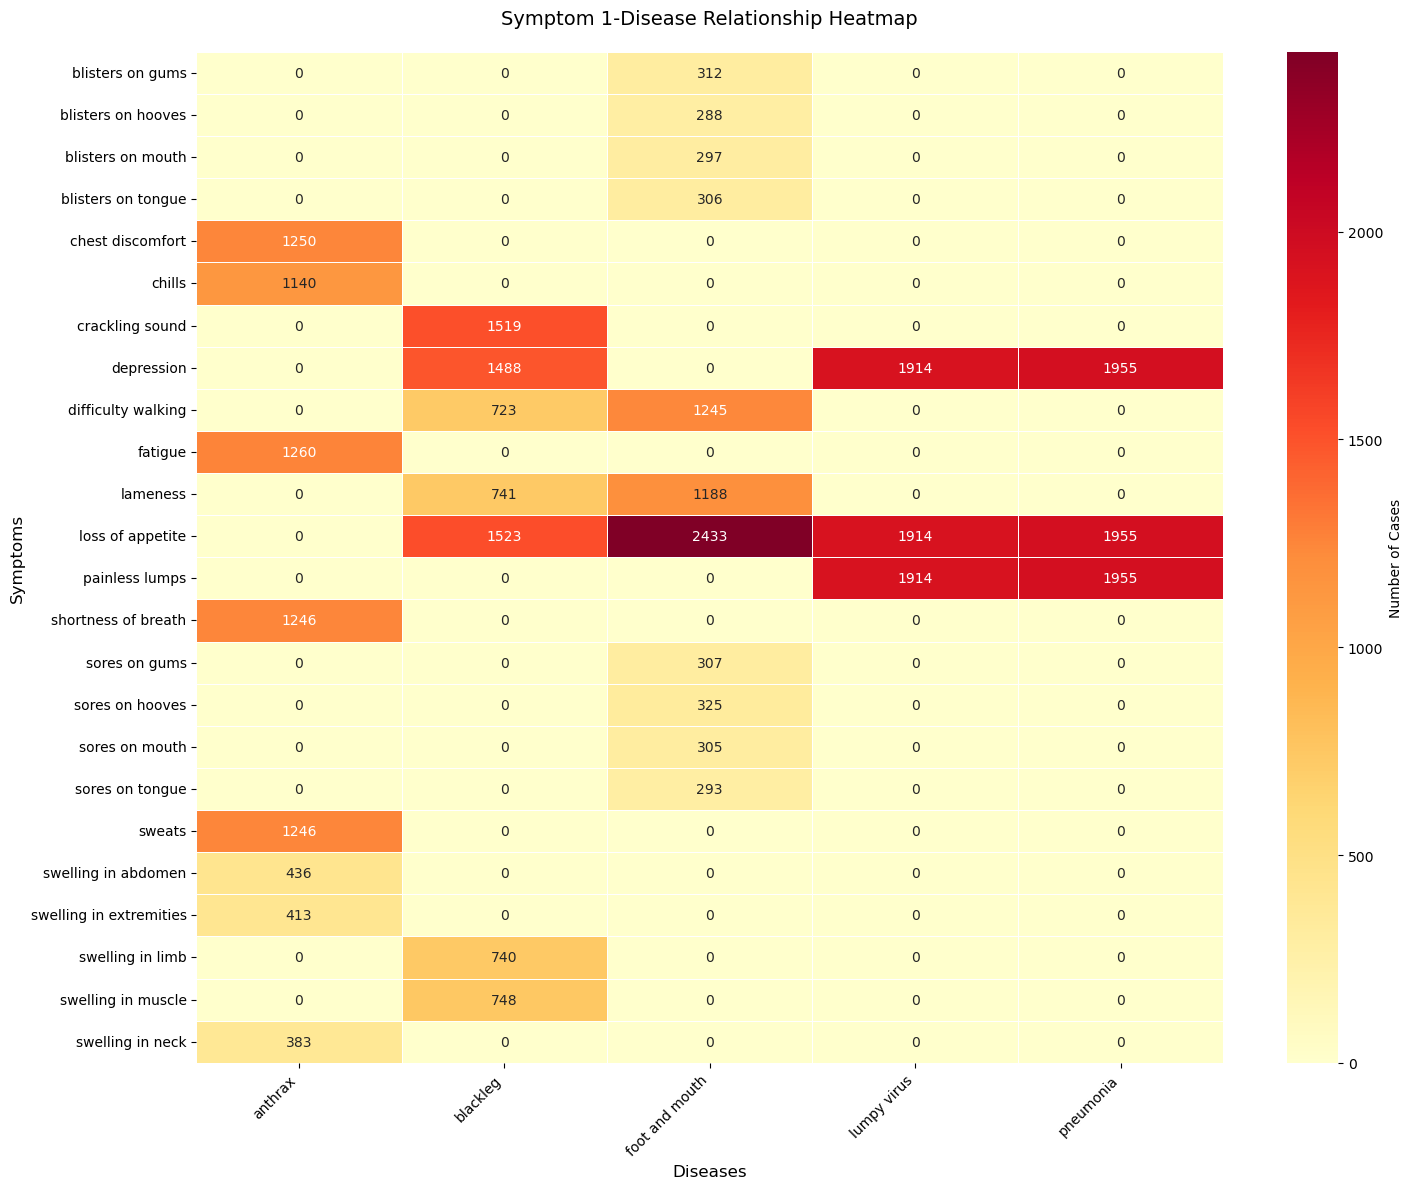

In [31]:
# Create heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(symptom_disease_matrix, 
            annot=True,  # Show numbers in cells
            fmt='.0f',   # Format numbers as integers
            cmap='YlOrRd',  # Yellow to Orange to Red color scheme
            cbar_kws={'label': 'Number of Cases'},
            linewidths=0.5)

plt.title('Symptom 1-Disease Relationship Heatmap', fontsize=14, pad=20)
plt.xlabel('Diseases', fontsize=12)
plt.ylabel('Symptoms', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

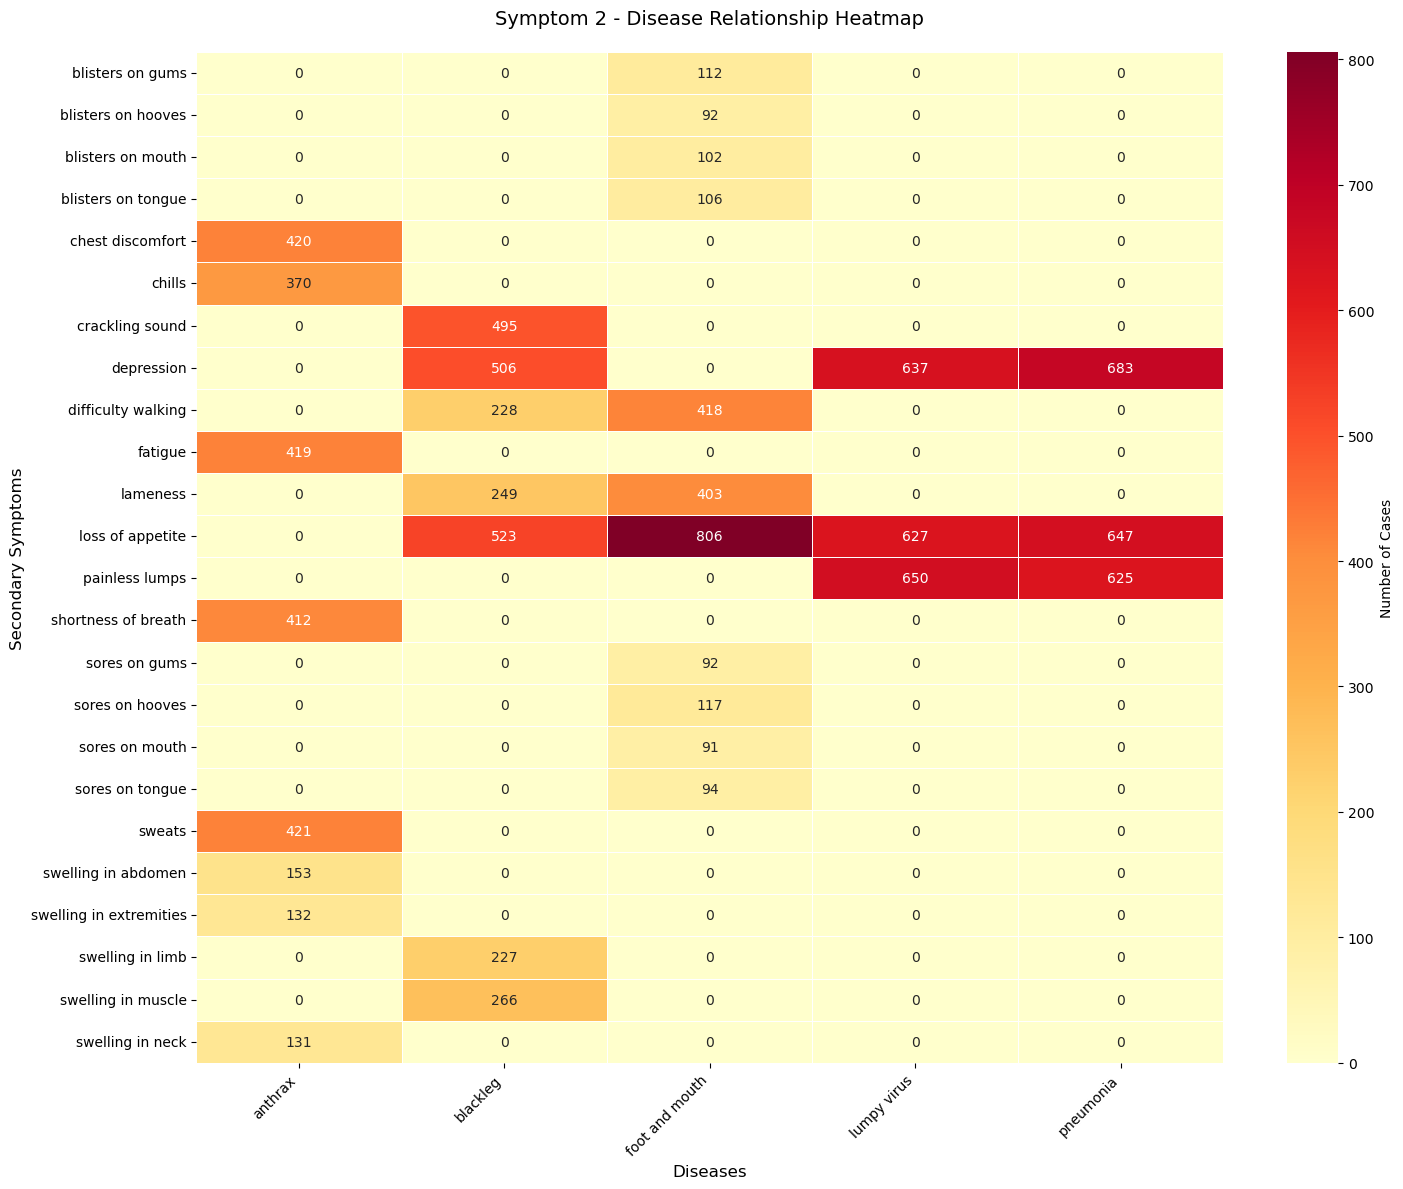

In [32]:
# Creating heatmap for Symptom 2
plt.figure(figsize=(15, 12))
sns.heatmap(symptom2_disease_matrix, 
            annot=True,  
            fmt='.0f',   
            cmap='YlOrRd',  
            cbar_kws={'label': 'Number of Cases'},
            linewidths=0.5)

plt.title('Symptom 2 - Disease Relationship Heatmap', fontsize=14, pad=20)
plt.xlabel('Diseases', fontsize=12)
plt.ylabel('Secondary Symptoms', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

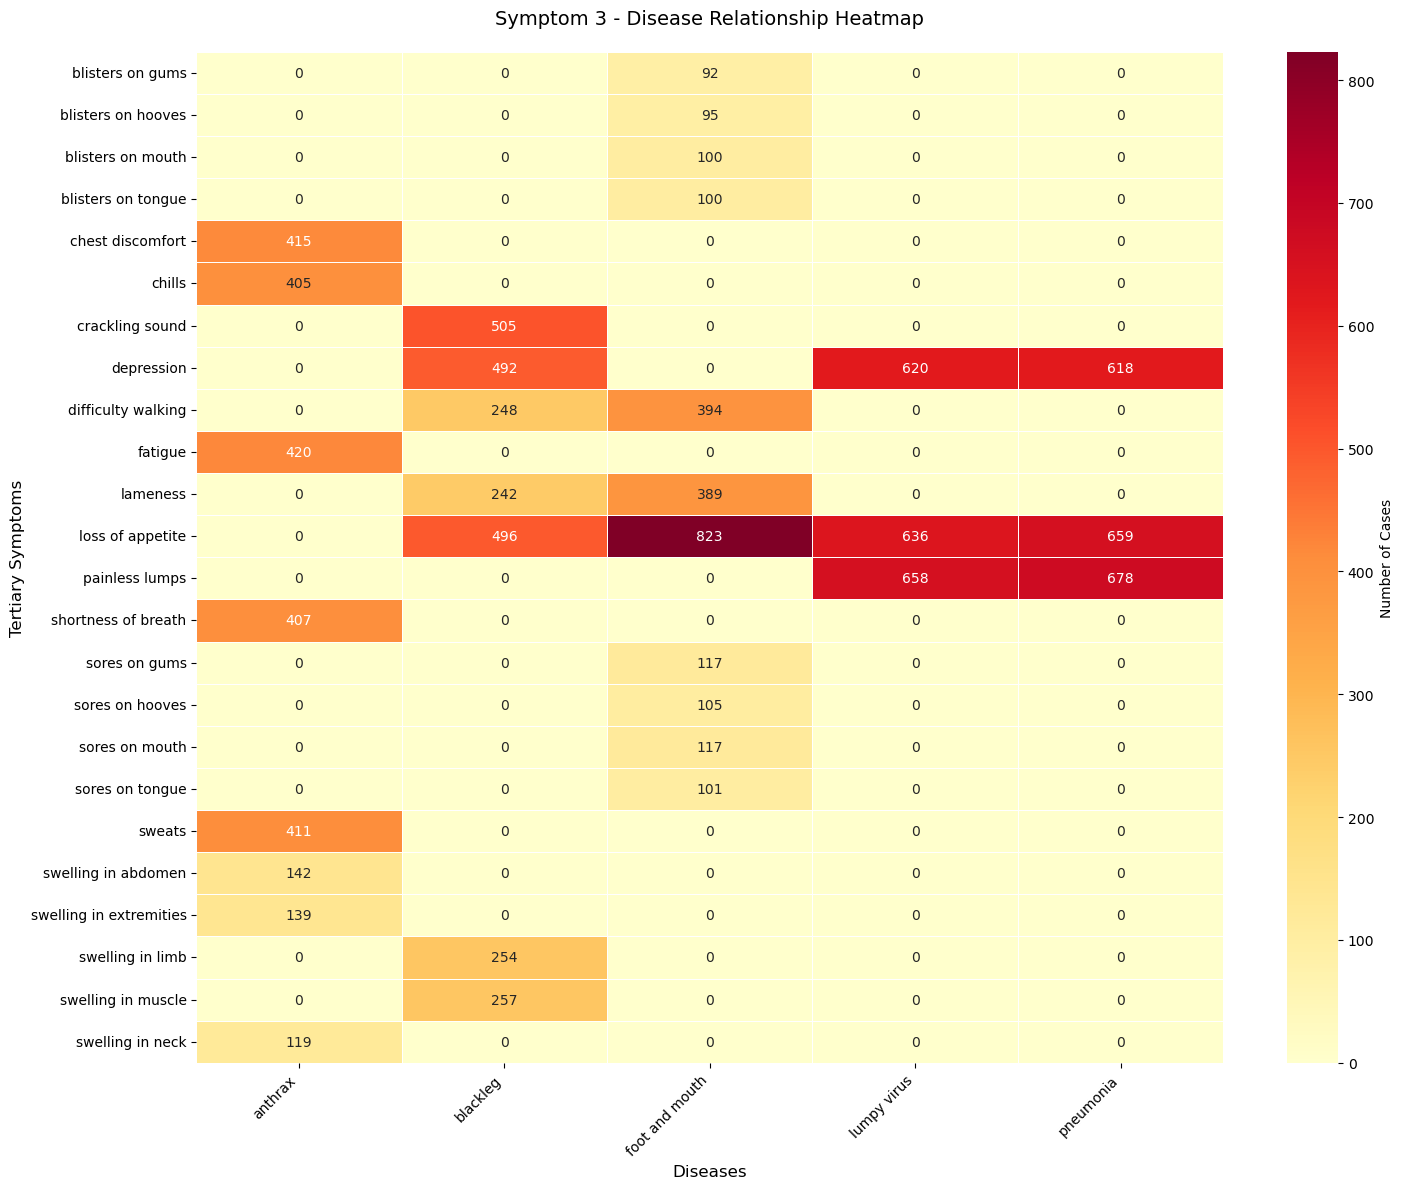

In [33]:
# Create heatmap for Symptom 3
plt.figure(figsize=(15, 12))
sns.heatmap(symptom3_disease_matrix, 
            annot=True,  
            fmt='.0f',   
            cmap='YlOrRd',  
            cbar_kws={'label': 'Number of Cases'},
            linewidths=0.5)

plt.title('Symptom 3 - Disease Relationship Heatmap', fontsize=14, pad=20)
plt.xlabel('Diseases', fontsize=12)
plt.ylabel('Tertiary Symptoms', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

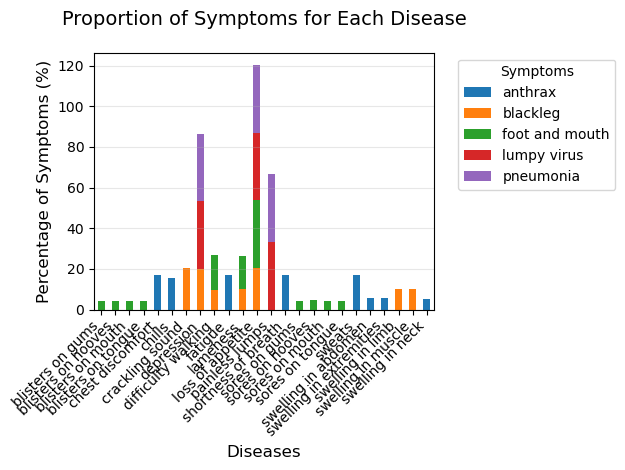

<Figure size 1500x800 with 0 Axes>

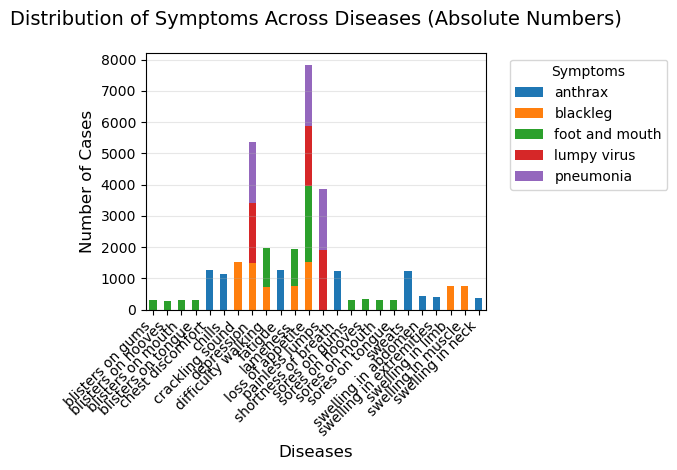

In [34]:
# Create a stacked bar chart
plt.figure(figsize=(15, 8))

# Normalize the data for percentage view
symptom_disease_normalized = symptom_disease_matrix.div(symptom_disease_matrix.sum()) * 100

# Create stacked bar plot
symptom_disease_normalized.plot(kind='bar', stacked=True)

plt.title('Proportion of Symptoms for Each Disease', fontsize=14, pad=20)
plt.xlabel('Diseases', fontsize=12)
plt.ylabel('Percentage of Symptoms (%)', fontsize=12)
plt.legend(title='Symptoms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Create an alternative version with absolute values
plt.figure(figsize=(15, 8))
symptom_disease_matrix.plot(kind='bar', stacked=True)
plt.title('Distribution of Symptoms Across Diseases (Absolute Numbers)', fontsize=14, pad=20)
plt.xlabel('Diseases', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(title='Symptoms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()